# Regridding Diagram

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import xarray as xr

In [2]:
#open example file
ds_ref = xr.open_dataset('/home/scratch/WRF_BCC/reflectivity/REFD/historical/1991-1992/REFD_historical-1991-1992_1992-06-01.nc')

#edit data for diagram
ds = ds_ref.sel(Time=ds_ref.Time.values[0], south_north=slice(10,20), west_east=slice(10,20))
vals = (ds.REFD.values)* 0 + 1

#create meshgrid for diagram
x, y = np.meshgrid(ds.west_east.values, ds.south_north.values)

### Plot Original WRF-BCC Grid

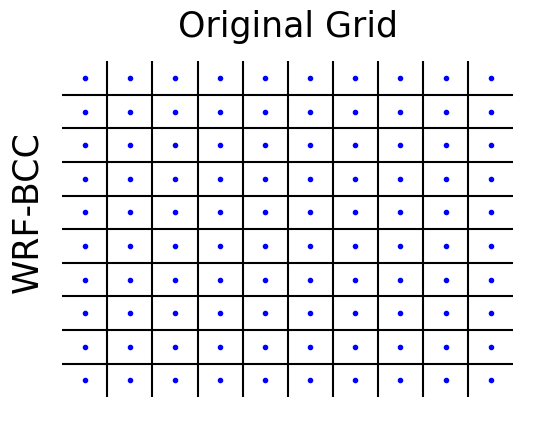

In [3]:
#plot the OG WRF-BCC Grid
plt.plot(x, y, '.', color='blue')
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.axis('off')

plt.annotate('WRF-BCC', xy=(-0.06,0.35), xycoords='axes fraction', fontsize=25, rotation='vertical')
plt.title('Original Grid',fontsize=25)

plt.vlines(x=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], ymin=-0.5, ymax=9.5, color = 'black', ls='-')
plt.hlines(y=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], xmin=-0.5, xmax=9.5, color = 'black', ls='-')

### Plot SPC Obs

In [4]:
#Create random points similiar to how SPC data.
xs = []
ys = []
for _ in range(100):
    xs.append(random.uniform(1, 9))
    ys.append(random.uniform(1, 9))

Text(-0.06, 0.35, 'SPC LSRs')

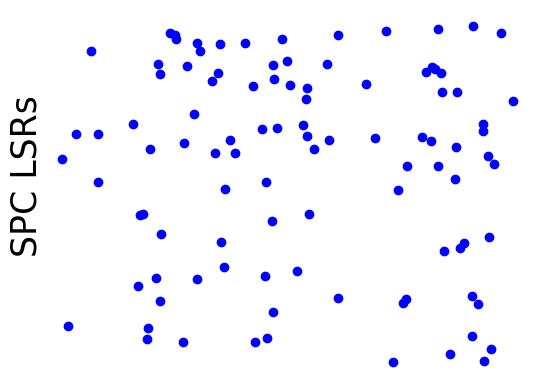

In [5]:
#plot the data
plt.scatter(xs, ys, color='blue')
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.axis('off')

plt.annotate('SPC LSRs', xy=(-0.06,0.35), xycoords='axes fraction', fontsize=25, rotation='vertical')

### New Grid

In [9]:
#coarsen the grid
ds_cor = ds.coarsen(south_north=3, west_east=3, boundary='trim').max()
x_cor, y_cor = np.meshgrid(ds_cor.west_east.values, ds_cor.south_north.values)

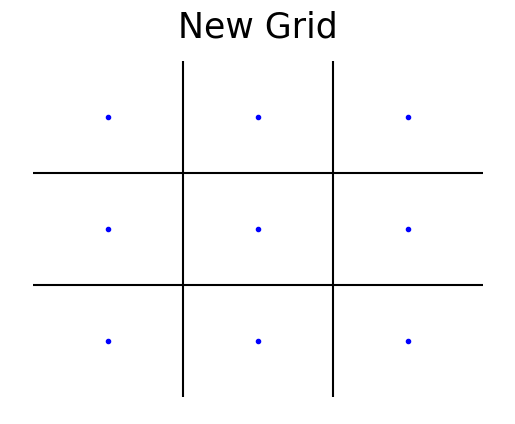

In [19]:
#plot the regrid
#plot the OG WRF-BCC Grid
plt.plot(x_cor, y_cor, '.', color='blue')
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.axis('off')

plt.title('New Grid',fontsize=25)

plt.vlines(x=[0.5,1.5], ymin=-0.5, ymax=2.5, color = 'black', ls='-')
plt.hlines(y=[0.5,1.5], xmin=-0.5, xmax=2.5, color = 'black', ls='-')